#  Customer Churn In Telecom Company

# Project Overview
A Churn is someone who stops to use a given service.The goal of this project is to predict churn ,and what may be features that can lead to customer churning.Accurately predicting , it will help business owners to find insights and come up with a marketing strategy . This will help them to understand ways they can retain customers for profitability.

# Introduction
 Customer churn is a significant issue faced by companies, especially those in service-based industries like telecommunications. Understanding and analyzing customer churn rates is crucial as it allows for insights into customer behaviour, identification of churn-contributing factors, and implementation of effective retention strategy.The beginning of a relationship can be exciting. It’s something new! There’s so much to learn But when it comes to business, that initial honeymoon period too frequently ends after a customer has been successfully on-boarded.  There’s an over-confidence that gives marketers the false assumption that just because an initial sale was made, additional sales to the same customer will follow. What marketers can fail to realize is that relationships need to be actively and repeatedly nurtured. Awareness of and occasional engagement with a brand is not enough to create a loyal customer strategies

## Challenges
 It’s not complicated. The majority of customers churn because they failed to connect with your brand or because an event occurred that caused them to disconnect. The following are causes of customer churn
#### 1. High charges 
#### 2 .poor onboarding 
#### 3. weak relationship building 
#### 4 .poor customer service 


## Solutions
 Churn can be an alarming hidden cost of business. As is easy to onboard a customer compared to retaining acustomer .
 #### The solution for churn reduction rate include:
 #### 1 Quality Customer service
 #### 2 Affordable charges
 ####  3 Show customers their values

# Problem Statement
The telecom industry is characterized by high customer churn rates, where customers switch from one service provider to another in search of better services or lower charges.Understanding the factors contributing to this churn is crucial for telecom providers to tailor their services and retain their customers.  This study aims to use  use different models to predict and  identify the key factors contributing to customer churn, and ultimately help the business owners to improve the marketing strategy ,hence customer retention 

## Objectives

### Main Objective
To develop and implement a ML based solution that leverages data analystics and predictive models to give accurate insights to business owners  to enable them make sound decison based on customer churn

### General Objectives
#### 1 To develop  a churn prediction model
####  2 To identifly  the features that contribute to customer churn
####  3   To  identifly  how customer service calls  impact on customer churn
####  4  How does the daily charges impact on customer churn
####  5 To provide an acumen recomendation based on my analysis 

## Business and Data Understanding
####  The project uses  the telecom  churn dataset .The data contins the following columns
- `state`- The state where the customer is located

-  `account_length`- numerical. Number of months the customer has been with the current telco provider

- `area_code` - The code associated with customer phone number

- `international_plan`- The customer has international plan.

- `voice_mail_plan`- The customer has voice mail plan.

- `number_vmail_messages`- Number of voice-mail messages.

- `total_day_minutes`-  Total minutes of day calls.

- `total_day_calls`-  Total minutes of day calls.

- `total_day_charge`-  Total charge of day calls.

- `total_eve_minutes`- Total minutes of evening calls.

- `total_eve_calls`- Total number of evening calls.

- `total_eve_charge` Total charge of evening calls.

- `total_night_minutes` Total minutes of night calls.

- `total_night_calls`Total number of night calls.

- `total_night_charge`Total charge of night calls.

- `total_intl_minutes`-Total minutes of international calls.

- `total_intl_calls`Total number of international calls.

- `total_intl_charge`-Total charge of international calls

- `number_customer_service_calls`- Number of calls to customer service

- `churn`- target variable

### Import packages 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import plot_confusion_matrix, recall_score,\
    accuracy_score, precision_score, f1_score, confusion_matrix,classification_report, plot_roc_curve

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImPipeline

### Load the dataset  with pandas

In [3]:
# Load the data and print the first 10 rows
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
# Lets check on the number of columns, rows , null values and datatypes using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [5]:
display(df.describe())

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


#### From the summary statistics, our data is not on the same scale it requires data preprocessing
#### The average mean for customers who churned was approximately 0.14

## Data Preprocessing
##### . Dealing  with outliers
##### . Checking for missing values
##### . Checking for Duplicates
####  . Checking and dealing with datatypes


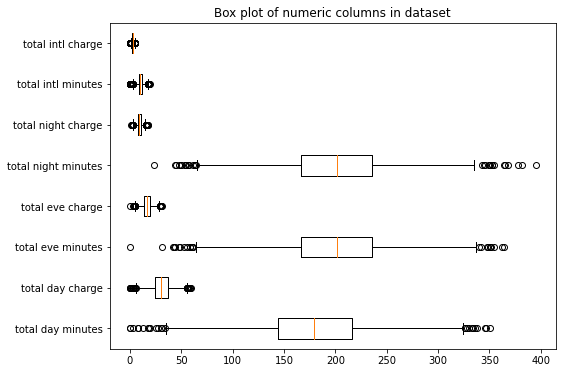

In [6]:
 # Checking for outliers
numeric_columns = df.select_dtypes(include=['float', 'int']).columns
plt.figure(figsize=(8,6))
plt.boxplot(df[numeric_columns].values, vert=False)
plt.title("Box plot of numeric columns in dataset")
plt.yticks(range(1, len(numeric_columns) + 1), numeric_columns)
plt.show()

#####   There is no outliers, but columns has different scale 

##### Converting the object to int/ float
##### Methods to use include
##### 1. For binary categorical data , i will use .map() function
##### 2 . For more than two ctegorigical i will use pd.get dummie

In [7]:
#  converting international plan  by use of map fuction
df['international plan'] = df['international plan'].map({'no': 0, 'yes':1})

In [8]:
# converting voice mail  using map fuction
df['voice mail plan'] = df['voice mail plan']. map({'no': 0, 'yes': 1})

In [9]:
# Converting  churn 
df['churn'] = df['churn'].map({False: 0, True:1})

In [10]:
# What to extract area code from phone number
df['area_code'] = df['phone number'].str[:3].astype(int)

### Dealing with missing values

In [11]:
# Checking for missing values
df.isna().sum().any()

False

In [12]:
# checking for duplicates
df.duplicated().any()

False

In [13]:
df.dtypes

state                      object
account length              int64
area code                   int64
phone number               object
international plan          int64
voice mail plan             int64
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                       int64
area_code                   int32
dtype: object

In [14]:
df.drop('phone number', axis = 1).head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,...,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,382
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,371
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,358
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,375
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,330


## EDA
#### Exploring our data to find more insights about our data 

## Univariate Analysis

 ### How many customers churned and by what percentage

In [15]:
print(df['churn'].value_counts())
print()
print(df['churn'].value_counts(normalize=True))

0    2850
1     483
Name: churn, dtype: int64

0    0.855086
1    0.144914
Name: churn, dtype: float64


<AxesSubplot:xlabel='churn', ylabel='count'>

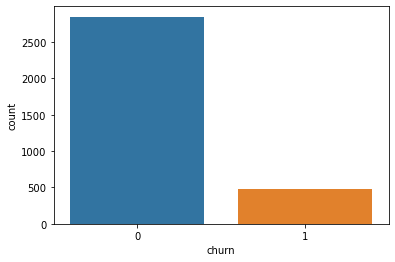

In [16]:
sns.countplot(x='churn', data=df)

## Findings
#### . The total number of customers who  did not churn was 2850  , and the percentage of accurancy was aproximately 86%.
#### . The total number of customers who churned(Left the company) was small , 483 with a percentage of aprroximately 15%
#### . There is a class imbalance , so we need to use SMOTE , to resample the minority class

###  Distribution of customers with international plan 

<AxesSubplot:xlabel='international plan', ylabel='count'>

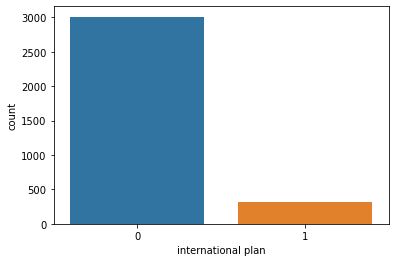

In [17]:
 sns.countplot(x='international plan', data=df)

 #### Most customers in telecom company had no international plan

###  How many customers had  voice mail plan

<AxesSubplot:xlabel='voice mail plan', ylabel='count'>

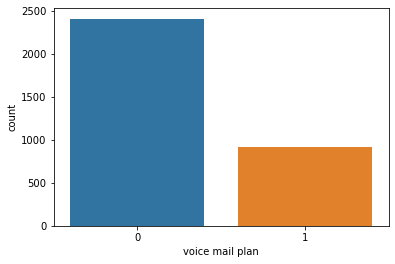

In [18]:
sns.countplot(x='voice mail plan', data=df)

#### Many customers did not have the voice mail plan

#### Plotting  Histogram, i will be interested on customer service calls, total day minutes, total day charge,

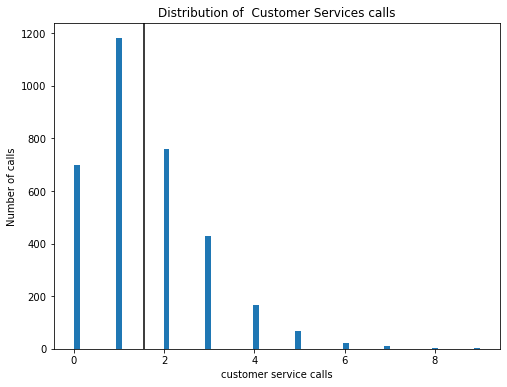

In [19]:
# Defining a fuction
def plot_histogram(df, column, title, xlabel, ylabel):
    # Extract the relevant data
    data = df[column]
    mean = data.mean()
    # Set up plot
    fig, ax = plt.subplots(figsize=(8,6))
    # Plot histogram
    ax.hist(data, bins='auto')
    # Plot vertical line
    ax.axvline(mean, color="black")
    # Customize title and axes labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

plot_histogram(
    df,
    "customer service calls",
    "Distribution of  Customer Services calls",
    "customer service calls",
    "Number of calls"
)

### What is the average number of calls made by customers

In [20]:
print(df['customer service calls'].mean())
print()
print(df['customer service calls'].std())
print()
print(df['customer service calls'].median())

1.5628562856285628

1.3154910448664767

1.0


#### The distribution of customers calls service is not normally distributed
####  The average calls made by  in daya was aproximately 2,
#### The total of customer who made calls within that were aproximtely 1200

### Distribution on total day minutes

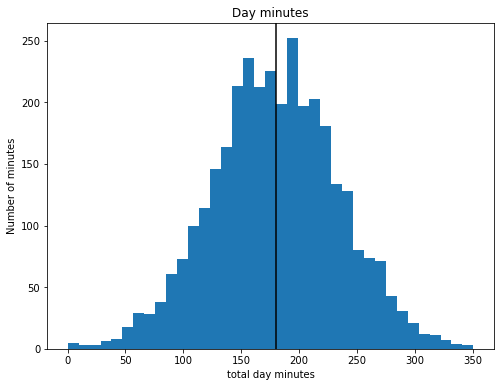

In [21]:
plot_histogram(df,'total day minutes','Day minutes','total day minutes', 'Number of minutes')

In [22]:
print(df['total day minutes'].mean())
print(df['total day minutes'].std())
print(df['total day minutes'].median())

179.77509750975094
54.46738920237137
179.4


#### The distribution of  total minutes spent by customers is normal with,
#### Most customers averagely they spent aproximately 180 minutes a day

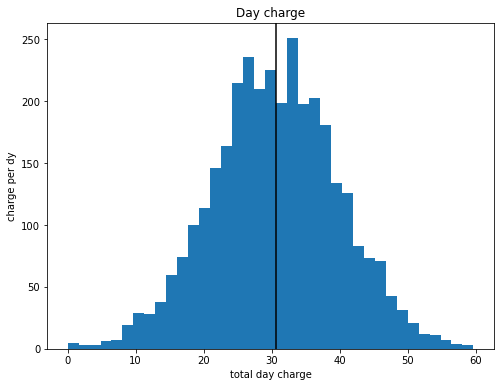

In [23]:
plot_histogram(df, 'total day charge','Day charge', 'total day charge', 'charge per dy')


#### The charges are also normally distributed ,
#### The average charge incurred on maybe spenting on minutes,calls by customer is aprroximately 31 per day

In [24]:
df['total day charge'].mean()

30.562307230723075

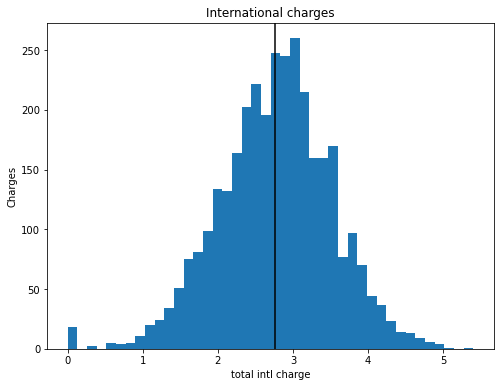

In [25]:
plot_histogram(df, 'total intl charge','International charges', 'total intl charge','Charges')

#### The distribution is normal
#### The average spending on international calls was aproximately 2.8
#### This was a bit low , it means most customers didnt make international calls

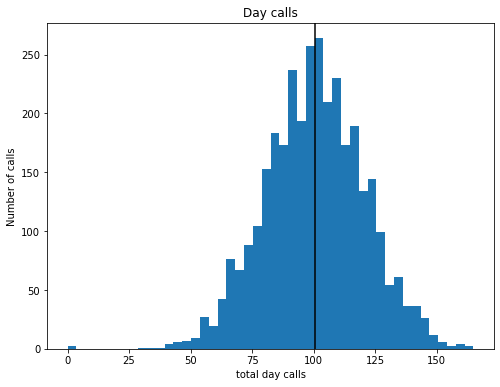

In [26]:
plot_histogram(df,'total day calls', 'Day calls', 'total day calls', 'Number of calls')

#### Again the distribution is normally distributed, with most customers making calls aproximately 100 per day

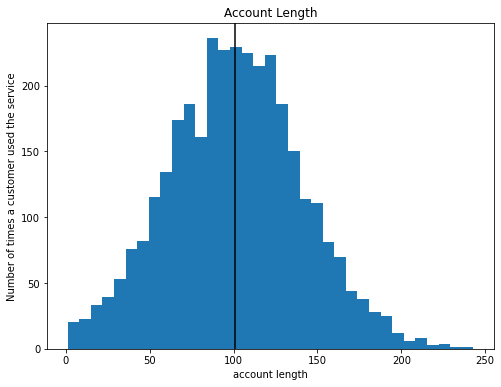

In [27]:
plot_histogram(df,'account length','Account Length','account length', 'Number of times a customer used the service')

#### The distribution is normally distributed, the the average number of times acustomer  used the service is 100 times

### Explore correlation
#### Lets explore , to find which features has had a strong impact on customer churn

In [28]:
df.corr()['churn'].sort_values(ascending= False)

churn                     1.000000
international plan        0.259852
customer service calls    0.208750
total day minutes         0.205151
total day charge          0.205151
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
area_code                 0.005836
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

 ## Bivariate Analysis
 #### From the correlation above lets plot a highly correlate feature to churn(Positively) and high negative correlated.
 #### We can see international plan is highly positive correlated and voice mail plan is highly negative correlated
 #### Lets plot  box plot to find the insights

Text(0, 0.5, 'churn')

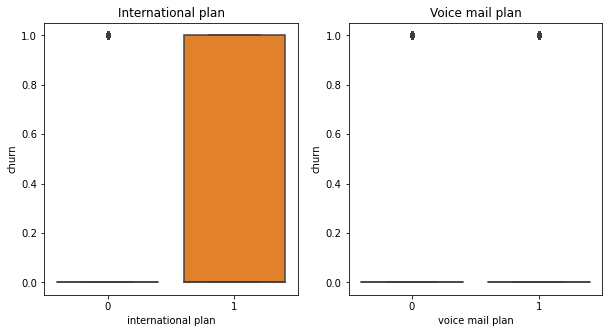

In [29]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))

# Plot distribution of column with highest correlation
sns.boxplot(
    x=df["international plan"],
    y=df["churn"],
    ax=ax1
)
# Plot distribution of column with most negative correlation
sns.boxplot(
    x=df["voice mail plan"],
    y=df["churn"],
    ax=ax2
)

# Customize labels
ax1.set_title("International plan")
ax1.set_xlabel("international plan")
ax1.set_ylabel("churn")
ax2.set_title("Voice mail plan")
ax2.set_xlabel("voice mail plan")
ax2.set_ylabel("churn")

#### International plan effected customers to stop using the service
#### On the other hand, voice  mail had no effect on customer churn

##  Engineer and Explore a New Features
#### As we have notice from above there are features that need to combined so us to get more insights bout our data

In [33]:
# Find  the total data using per day
df['data_usage'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes']

In [34]:
# Renaming total day minutes and total day calls 
df['day_minutes'] = df['total day minutes']
df['day_calls']   = df['total day calls']

In [35]:
# Creating a column to show the total day charge
df['daily_charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge']

In [36]:
df.columns


Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'area_code', 'data_usage',
       'day_minutes', 'day_calls', 'daily_charge'],
      dtype='object')

In [37]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total intl minutes,total intl calls,total intl charge,customer service calls,churn,area_code,data_usage,day_minutes,day_calls,daily_charge
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,10.0,3,2.70,1,0,382,707.2,265.1,110,72.86
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,13.7,3,3.70,1,0,371,611.5,161.6,123,55.54
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,12.2,5,3.29,0,0,358,527.2,243.4,114,59.00
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,6.6,7,1.78,2,0,375,558.2,299.4,71,65.02
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,10.1,3,2.73,3,0,330,501.9,166.7,113,49.36


## DIstribution of Churn vs voice mail plan

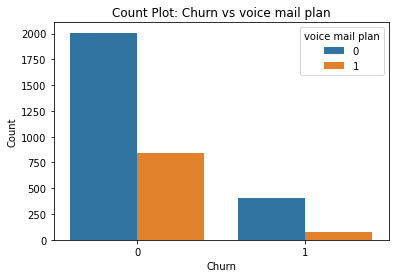

In [38]:
#  
sns.countplot(data=df, x='churn', hue='voice mail plan')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Plot: Churn vs voice mail plan')

# Show the plot
plt.show()

#### Most customers didnt have voice mail plan approximatly 2000 customers , leading no churn
#### Again very customers had the voice mail plan and very few churned 

### Distribution between churn and  Data usage

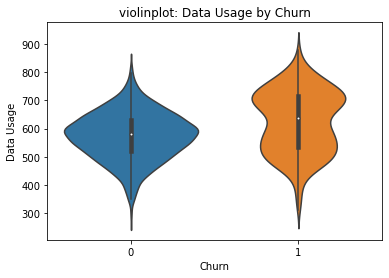

In [39]:
sns.violinplot(data=df, x='churn', y='data_usage')
plt.xlabel('Churn')
plt.ylabel('Data Usage')
plt.title('violinplot: Data Usage by Churn')
plt.show()

#### From the above , most customers who had a high data plan left the company
#### Also customers with at least minimal data usage didnt leave the service
#### Customers whose data usage was high mostly left the service as compared to customers with lower data usage

### Distribution of churn vs data plan

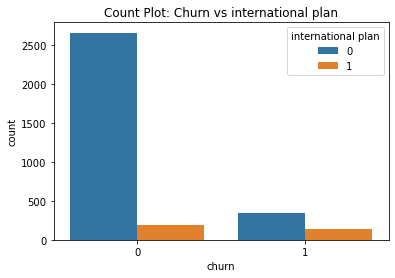

In [40]:
sns.countplot(data=df, x='churn', hue='international plan')
plt.xlabel('churn')
plt.ylabel('count')
plt.title('Count Plot: Churn vs international plan')
plt.show()

#### The number of customer who had no international plan and didn't churn was high were aproximately 3000
#### Customers who had  international plan   and left the service were approximately 500
#### If only the business owners  will convice the customers to have international plan  , they will make a lot of profit

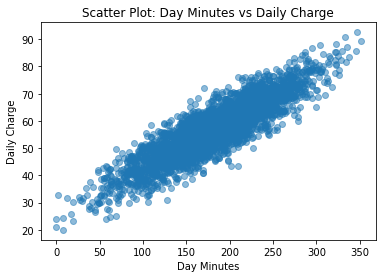

In [41]:
plt.scatter(df['day_minutes'], df['daily_charge'], alpha=0.5)
plt.xlabel('Day Minutes')
plt.ylabel('Daily Charge')
plt.title('Scatter Plot: Day Minutes vs Daily Charge')
plt.show()

#### There is a high positive correlation between average day minutes and daily  charges.
#### As the average day mins increases, the monthly charge increases.
####  It therefore means as the number of minutes spending increase, there is also an increase in daily charges
#### from telecom company this can highly effect  customer churn

### Distribution  of customer calls vs churn

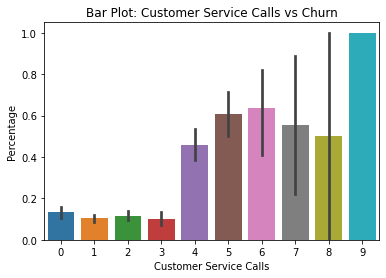

In [42]:
sns.barplot(data=df, x='customer service calls', y='churn')
plt.xlabel('Customer Service Calls')
plt.ylabel('Percentage')
plt.title('Bar Plot: Customer Service Calls vs Churn')
plt.show()

####  The percentage of customers who made many customer  services left the service 
####  Also  the percentage of customer sevice calls was low as 10% 
#### The business owners should find out reasons why most customer left the service due to many customer service calls made by customers

## Multivariate Analysis


#### Basically i will be focusing on international plan  , data usage and churn
#### We also focus of customer service calls, day minutes and churn
#### We also check the daily charge , data plan and churn

In [43]:
# Lets creat a fuction to iterite through 
def barplot(cat_var1, num_var, cat_var2):
    sns.barplot(data = df, x = cat_var1, y = num_var, hue = cat_var2, errwidth = 0) 
    plt.ylabel('{}'.format(num_var.replace('_', ' ').capitalize()));
    plt.xlabel('{}'.format(cat_var1.replace('_', ' ').capitalize()));

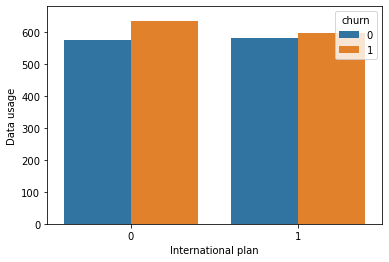

In [44]:
barplot('international plan', 'data_usage', 'churn')


#### Findings ( 1 means had international plan, 0 otherwise, color =orange means  customers 
#### churned or otherwise
####  Customers who didnt have international plan  and their data usage was high  left the service.
#### Customers  costomers with international plan and data usage was high  left the service


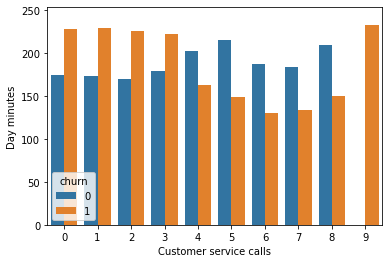

In [45]:
barplot('customer service calls','day_minutes', 'churn')


###  Findings
#### Most customer services calls between 0, to 4 and the day minutes  used in aday made many customers to churn
#### Also  the number of customer servce calls made between 4 to 8 , made the customers not churn as the day minutes decreased
#### The number of customer service calls made 9 times automatically lead to churning
#### We can see that the higher the customer call services leads to churning , and if the calls were few .
#### If the calls were moderate then customers wont churn


In [46]:
#barplot('day_calls','customer service calls', 'churn')

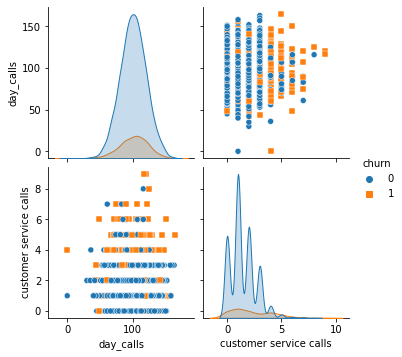

In [47]:
# Create a pair plot
sns.pairplot(df, vars=['day_calls', 'customer service calls'], hue='churn', markers=['o', 's'])
plt.show()

<AxesSubplot:xlabel='day_calls', ylabel='customer service calls'>

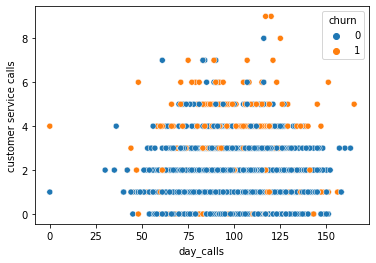

In [48]:
sns.scatterplot(x='day_calls', y='customer service calls', hue='churn', data=df)

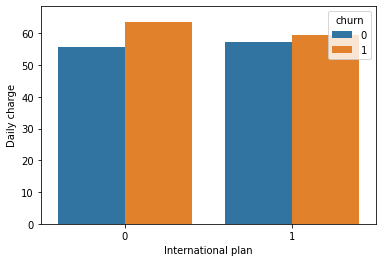

In [49]:
barplot('international plan', 'daily_charge', 'churn')

<AxesSubplot:xlabel='daily_charge', ylabel='data_usage'>

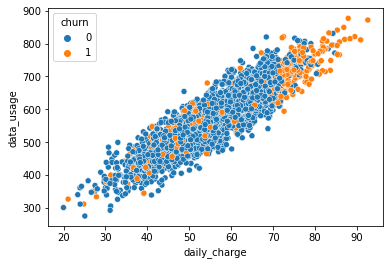

In [50]:

sns.scatterplot(x='daily_charge', y='data_usage', hue='churn', data=df)

### Findings
####  We can see as the data usage increases so thus the daily charge .
#### we can conclude that most customers  churned due to their daily charges and with the daily data usage
#### Therefor it means that if at all the customers spent few minutes on calls, there charges will be small
####  This can also be seen that there is a strong correlation between data usage and daily spent

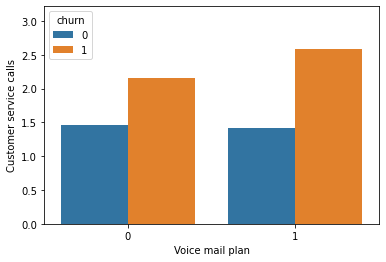

In [51]:
barplot('voice mail plan', 'customer service calls', 'churn')

### Findings
#### Customers with voice mail plan ,and had many  customer sevice calls left the service
#### On the other hand customer with  no voice plan  with  many customer  service  calls calls also left
#### Business owners should consider if having a voice  mail plan is profitable

### Correlation Matrix 

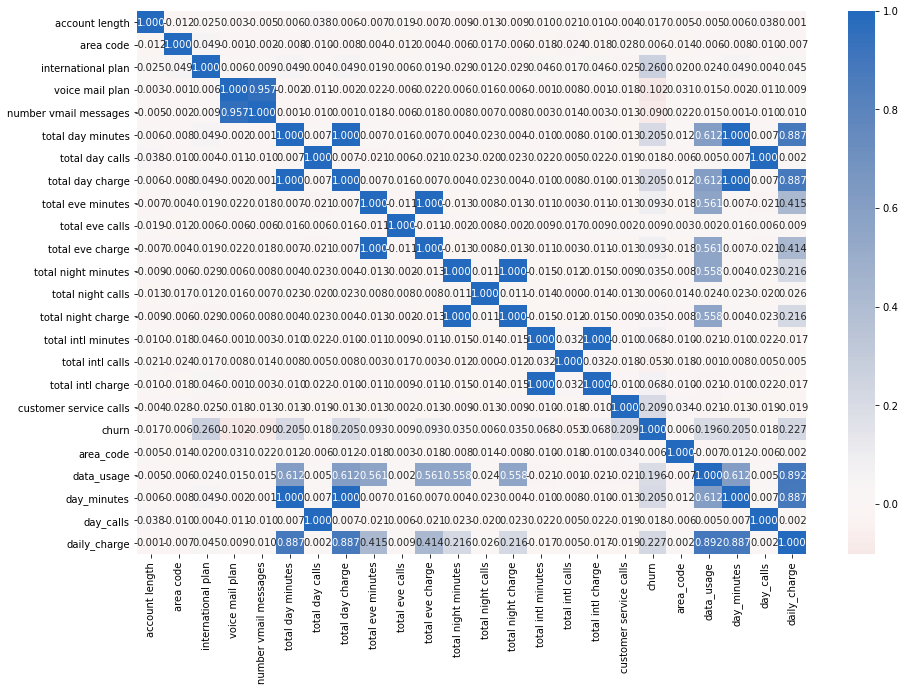

In [52]:
# Threshold of 0.5 to avoid multicolinearity
plt.figure(figsize = [15, 10])
sns.heatmap(df.corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

In [53]:
df.corr()['churn'].sort_values(ascending=False)

churn                     1.000000
international plan        0.259852
daily_charge              0.226962
customer service calls    0.208750
day_minutes               0.205151
total day minutes         0.205151
total day charge          0.205151
data_usage                0.196457
total eve minutes         0.092796
total eve charge          0.092786
total intl charge         0.068259
total intl minutes        0.068239
total night charge        0.035496
total night minutes       0.035493
day_calls                 0.018459
total day calls           0.018459
account length            0.016541
total eve calls           0.009233
area code                 0.006174
total night calls         0.006141
area_code                 0.005836
total intl calls         -0.052844
number vmail messages    -0.089728
voice mail plan          -0.102148
Name: churn, dtype: float64

## Data preprocessing,
####  To scale my data  using standard scaler

In [54]:
# Let select the columns i my need to use
selected_columns = ['international plan','daily_charge','customer service calls','churn','day_minutes','data_usage','day_calls']


In [55]:
# Creating a dataframe of columns to use
new_df = df[selected_columns]
new_df.head()

,international plan,daily_charge,customer service calls,churn,day_minutes,data_usage,day_calls
0,0,72.86,1,0,265.1,707.2,110
1,0,55.54,1,0,161.6,611.5,123
2,0,59.00,0,0,243.4,527.2,114
3,1,65.02,2,0,299.4,558.2,71
4,1,49.36,3,0,166.7,501.9,113


In [56]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   international plan      3333 non-null   int64  
 1   daily_charge            3333 non-null   float64
 2   customer service calls  3333 non-null   int64  
 3   churn                   3333 non-null   int64  
 4   day_minutes             3333 non-null   float64
 5   data_usage              3333 non-null   float64
 6   day_calls               3333 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 182.4 KB


#####  Declaring my variables , X and y

In [57]:
X = new_df.drop('churn', axis=1)
y = new_df['churn']
# Let me split my data into traing and testing by usin train_test_split from sklearn with test_size= 0.2,randomstate=42
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)


### Building my first model with logistic regression


###   Use pipeline 

In [58]:
# Steps for my pipeline 
pipeline_1 = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(fit_intercept=False, solver='liblinear', random_state=42))
])

In [59]:
# To confirm 
pipeline_1

Pipeline(steps=[('scaler', StandardScaler()),
                ('logreg',
                 LogisticRegression(fit_intercept=False, random_state=42,
                                    solver='liblinear'))])

In [60]:
# Lets fit on traing data
pipeline_1.fit(X_train, y_train)
# Lets make prediction
y_pred = pipeline_1.predict(X_test)
# Lets score the training 
pipeline_1.score(X_train, y_train)

0.700675168792198

In [61]:
# Scoring it on  test data(unseen)
pipeline_1.score(X_test, y_test)

0.6956521739130435

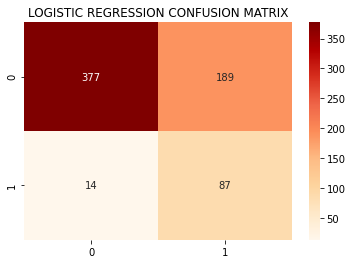

In [62]:
# Lets plot a confusion matrix to see how it perfirmed
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX");

#### Lets plot  a classifiction report to check how it performed

In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.67      0.79       566
           1       0.32      0.86      0.46       101

    accuracy                           0.70       667
   macro avg       0.64      0.76      0.62       667
weighted avg       0.87      0.70      0.74       667



### Summary from the report and confusion matrix
#### 1. The model accurately predicted 87, customers churned and actually they churned
#### 2  The model accurately predicted 377 customers didnt churn and actually they didnt
#### 3 Model model  incuarately predicted 189 customers to have churned , but actually they didnt
#### 4 . Lastly 14 customers were wrongly predicted to have not churned, but actually they churned

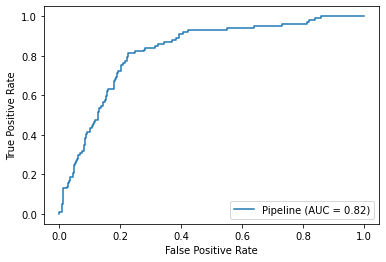

In [64]:
# Lets plot roc curve
plot_roc_curve(pipeline_1, X_test, y_test)

## Building my second model with decision tree

In [65]:
# Creating a pipeline, for a decision and use cross validation
pipe = Pipeline([
    ('ss', StandardScaler()),
    ('dt', DecisionTreeClassifier(random_state=42,))
])

In [66]:
pipe.fit(X_train, y_train)
# Lets make prediction
y_pred =pipe.predict(X_test)
#Lets cross validate
scores = cross_val_score(pipe, X_train,y_train, cv=5)
scores


array([0.89138577, 0.88180113, 0.90243902, 0.85365854, 0.87242026])

In [67]:
np.mean(scores)

0.8803409434267202

In [68]:
# Lets test it on unseen data( testing data, the prediction must be the same ie 0.88)
pipe.score(X_test, y_test)

0.8875562218890555

#### Decision Tree has performed much better compared  to Logistic Regression

### Building my Third model with Random Forest with Hyperparametre Tuning

In [69]:
# Creating a more complex model with hyperparameters and tuning
pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(max_features= 'sqrt',max_samples=0.5, random_state=42))
])
random_forest_model = pipe3.named_steps['rf'] #


In [70]:
pipe3.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_features='sqrt', max_samples=0.5,
                                        random_state=42))])

In [71]:
print(pipe3.named_steps.keys())# Checking on keys to help me access important fetures

dict_keys(['scaler', 'rf'])


In [72]:
# Access feature importances from the RandomForestClassifier
feature_importances = pipe3.named_steps[ 'rf'].feature_importances_

In [73]:
# Lets make prediction
y_pred = pipe3.predict(X_test)
# Lets score it on test data
accuracy = pipe3.score(X_test, y_pred)
pipe3.score(X_train, y_train)


0.9714928732183046

In [74]:
# Lets cross validate to avoid overfitting
scores = cross_val_score(pipe3, X_train, y_train, cv=5)
scores

array([0.92322097, 0.92120075, 0.91181989, 0.89493433, 0.92120075])

In [75]:
# The mean of those 5 different model
np.mean(scores)

0.9144753392218451

In [76]:
# Lets check how it performed on testing data
pipe3.score(X_test, y_test)

0.9280359820089955

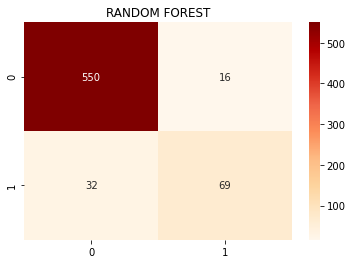

In [77]:
# Lets plot the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix , annot=True,fmt = "d", cmap='OrRd')
plt.title("RANDOM FOREST");

#### We are doing better , there is no overffiting and Random Forest can accurately predict  approximately 93% of class  0
#### That is  the customers wil not churn

### Feature Importance

In [78]:
# Lets check on the features they effected customers  to churn
random_forest_model = pipe3.named_steps['rf']
feature_importance = {name: score
                     for name, score
                         in zip(X_test.columns,random_forest_model.feature_importances_)
                     }
feature_importance

{'international plan': 0.0703309486107111,
 'daily_charge': 0.30602316051102435,
 'customer service calls': 0.17034538901266824,
 'day_minutes': 0.18141827512055286,
 'data_usage': 0.16831760714406574,
 'day_calls': 0.10356461960097778}

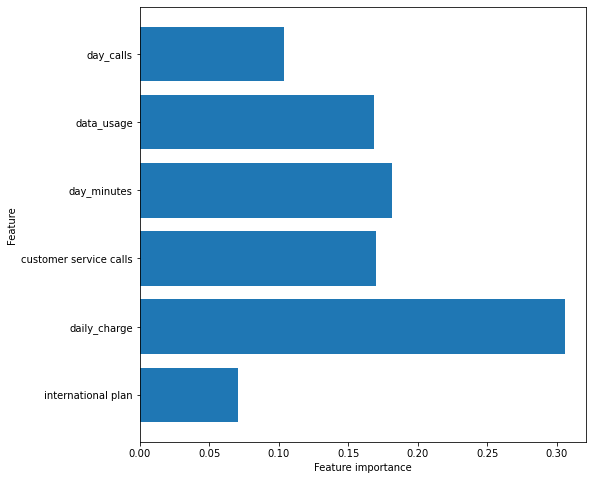

In [79]:
def plot_feature_importances(model, X_train):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(pipe3.named_steps['rf'], X_train)
plt.show()

### Key features that impact customers churn
##### . `Daily charge`
##### . `Day minutes spent by a customer`
##### . `Customer service calls`
#### .  `Data usage`
#### . `Other features include`
#####  .`Day calls` 
#####  .` International plan`

## VotingClassifier
#### To check on how the three model performed and compare it with random forest

In [80]:
# :Lets check the average perform on the three models
avg = VotingClassifier(estimators=[
    ('pipeline_1', pipeline_1),
    ('pipe', pipe),
    ('pipe3', pipe3)
])
avg.fit(X_train, y_train)

VotingClassifier(estimators=[('pipeline_1',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('logreg',
                                               LogisticRegression(fit_intercept=False,
                                                                  random_state=42,
                                                                  solver='liblinear'))])),
                             ('pipe',
                              Pipeline(steps=[('ss', StandardScaler()),
                                              ('dt',
                                               DecisionTreeClassifier(random_state=42))])),
                             ('pipe3',
                              Pipeline(steps=[('scaler', StandardScaler()),
                                              ('rf',
                                               RandomForestClassifier(max_features='sqrt',
                                                

In [81]:
scores = cross_val_score(estimator=avg,X=X_train, y=y_train, cv=5)
scores

array([0.91573034, 0.90619137, 0.90806754, 0.87054409, 0.90994371])

In [82]:
np.median(scores)

0.9080675422138836

In [83]:
# Lets check on testing data, it should be as the one above
avg.score(X_test, y_test)

0.9220389805097451

####  Random Forest still performs better as compared to VotingClassifier  

## Dealing with class imbalance
### Using Smote , with Ratio of 0.8 , 
#### If a use  smote = auto, the minority classs will have same values as Majority class

In [85]:
# checking on y_train value counts
y_train.value_counts()

0    2284
1     382
Name: churn, dtype: int64

In [86]:
# Using smote to resample minority class
sm = SMOTE(sampling_strategy=0.8, random_state=42)

In [87]:
# Fitting on training data and checking on value counts
X_train_resmp, y_train_resmp = sm.fit_resample(X_train, y_train)

y_train_resmp.value_counts()

0    2284
1    1827
Name: churn, dtype: int64

### `imblearn`pipeline

In [88]:
# Using imblearn pipeline
imb_pipe= ImPipeline([
    ('ss', StandardScaler()),
    ('sm', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier())
])

In [89]:
imb_pipe.fit(X_train, y_train)

Pipeline(steps=[('ss', StandardScaler()), ('sm', SMOTE(random_state=42)),
                ('rf', RandomForestClassifier())])

In [95]:
imb_pipe.score(X_train, y_train)

1.0

In [96]:
# Lets cross validate to avoid overfitting 
scores = cross_val_score(imb_pipe, X_train, y_train, cv=10)

In [97]:
np.mean(scores)

0.8885795950550535

In [98]:
imb_pipe.score(X_test, y_test)

0.8920539730134932

In [99]:
# Lets make predictions
y_pred = imb_pipe.predict(X_test)

### Final model Evaluation

In [100]:
final_model = imb_pipe

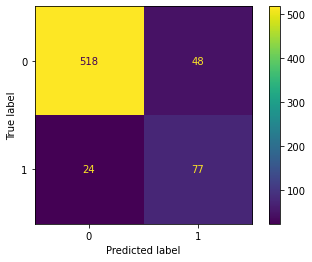

In [101]:
plot_confusion_matrix(final_model, X_test, y_test)

In [102]:
y_hat = final_model.predict(X_test)

In [103]:
print(f"""
Our final model's accuracy on the test set is {round(accuracy_score(y_test, y_hat), 1)}. \n
Our final model's recall on the test set is {round(recall_score(y_test, y_hat), 3)} \n
Our final model's precision on the test set is {round(precision_score(y_test, y_hat), 1)} \n
Our final model's f1-score on the test is {round(f1_score(y_test, y_hat), 1)}.
""")


Our final model's accuracy on the test set is 0.9. 

Our final model's recall on the test set is 0.762 

Our final model's precision on the test set is 0.6 

Our final model's f1-score on the test is 0.7.



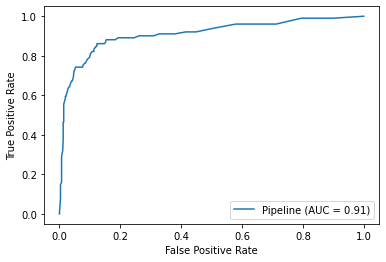

In [104]:
plot_roc_curve(final_model, X_test, y_test)

In [ ]:
# my model is performing well , from the ROC curve , it explains the modelis 91% of seperating two class
#That is true positive positive rate and False positive rate

### Model Interpretation

#### This model has 90% accuracy, meaning that it assigns the correct label 90% of the time.
##### This is definitely an  improvement over a "dummy" model, which would have about 86% accuracy and And our baseline model
#### If our model labels  churn as 1, there is about an 60% chance that it really is class 1.
#### If a given churn of customer  really is a class 1, there is about a chance that our model  will label it correctly.
#### If the business really cared about avoiding "false negatives" ( meaning saying no churn , when actually is) more so than
#### avoiding "false positives" (labeling churn when there is actually no churn), then we might want to adjust the decision threshold  on this and  evaluate the model by recall


## Conclusions
#### Customer churn in the telecommunication company was mostly affected by daily charges and also by high monthly charges.
#### Many customer service calls made by customers lead to  churn , the business owners should investigate this matter
#### Business Owners should consider highly on features like `daily charge` ,`customer service calls`,`data usage`


# Recommendation
####  To improve customer service calls for customer retention
#### The  business owners should revise their charges imposed on customers
#### Business owners should maximize on international plan , to help them identify patterns that contribute patterns that contribute
#### customer satisfaction

## Next Steps
#### To provide a more balanced data
#### The  business owners should to find out customer service calls made between 0 to 3 , had i high % on customer churn